In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
from keras.applications import VGG16

In [ ]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

In [ ]:
conv_base.summary()

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
os.getcwd()

In [ ]:
base_dir = "/home/kailash/VScode Python projects/tf/conv/small_dataset"



In [28]:

train_dir = os.path.join(base_dir,"train")

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')



In [29]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory,sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode = "binary")
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

    





Found 2000 images belonging to 2 classes.


2022-09-16 11:45:08.875609: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-16 11:45:09.767440: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-16 11:45:09.768223: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-16 11:45:09.768265: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-16 11:45:09.769207: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-16 11:45:09.769294: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-09-16 11:45:10.109689: W tensorflow/core/common_runtime/bf

1/1 [==============================] - 0s 24ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 22ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step


In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

/home/kailash/anaconda3/envs/tensorflow1/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
 42/100 [===========>..................] - ETA: 0s - loss: 0.6656 - acc: 0.6119

2022-09-16 11:45:58.777169: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


100/100 [==============================] - 1s 8ms/step - loss: 0.5979 - acc: 0.6685 - val_loss: 0.4556 - val_acc: 0.8030
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4227 - acc: 0.8135 - val_loss: 0.3667 - val_acc: 0.8520
Epoch 3/30
100/100 [==============================] - 1s 5ms/step - loss: 0.3433 - acc: 0.8595 - val_loss: 0.3222 - val_acc: 0.8800
Epoch 4/30
100/100 [==============================] - 1s 5ms/step - loss: 0.3122 - acc: 0.8730 - val_loss: 0.3021 - val_acc: 0.8860
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2848 - acc: 0.8915 - val_loss: 0.2859 - val_acc: 0.8980
Epoch 6/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2640 - acc: 0.8960 - val_loss: 0.2755 - val_acc: 0.9020
Epoch 7/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2531 - acc: 0.9000 - val_loss: 0.2662 - val_acc: 0.9010
Epoch 8/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2428 - acc:

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

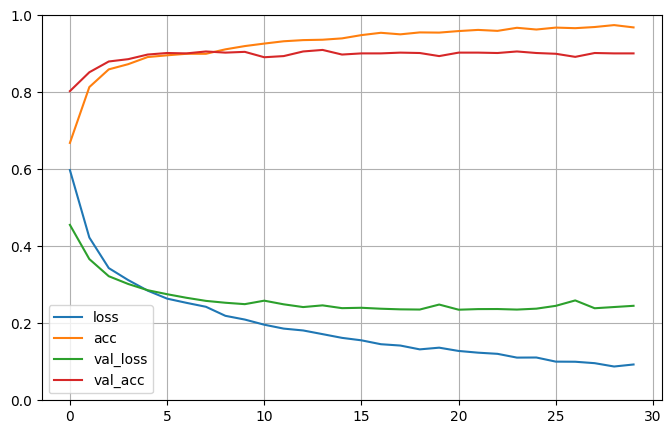

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()